In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
csv_file_path = 'trade.csv'
trade = pd.read_csv(csv_file_path,parse_dates=True)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


In [2]:
print(f'데이터 건수: {len(trade)}')

데이터 건수: 199


In [3]:
print('컬럼별 결측치 개수:')
len(trade) - trade.count()

컬럼별 결측치 개수:


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [4]:
trade = trade.drop('기타사항', axis=1)
trade

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0
195,2020년 05월,일본,166568.0,1798128.0,133763.0,3102734.0,-1304606.0
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN


In [5]:
trade.isnull()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


In [6]:
trade.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [7]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


In [8]:
newtrade = trade.dropna(how='all', inplace=False,subset=set(trade.keys()) - {'기간','국가명'})

In [9]:
help(trade.dropna)

Help on method dropna in module pandas.core.frame:

dropna(axis: 'Axis' = 0, how: 'str' = 'any', thresh=None, subset: 'IndexLabel' = None, inplace: 'bool' = False) method of pandas.core.frame.DataFrame instance
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. versionchanged:: 1.0.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at least one NA or all NA.
    
      

In [10]:
import matplotlib.font_manager as fm
meneger = fm.FontManager() 
# 사용법을 알아봐야하겠음.
# # 이렇게 하면 인스턴스가 새로 생겨서 그런지는 몰라도 ttflist 에 있는 내용들이 반영되지 않음.

In [11]:
# fontpath = '/home/hchang/Working/env/deep/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
# fp = fm.FontProperties(fname=fontpath)

In [12]:
# fe = fm.FontEntry(fname=fontpath, name='NanumGothic')

In [13]:
# meneger.ttflist.append(fe)

In [14]:
# meneger.ttflist # 여기에는 추가되어있지만, 아래에는 없는 현상이 생김

In [15]:
fm.fontManager.ttflist = meneger.ttflist

In [16]:
[i.fname for i in fm.fontManager.ttflist if 'Nanum' in i.fname]


['/home/hchang/Working/env/deep/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumMyeongjoExtraBold.ttf',
 '/home/hchang/Working/env/deep/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareRoundR.ttf',
 '/home/hchang/Working/env/deep/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumMyeongjoEcoBold.ttf',
 '/home/hchang/Working/env/deep/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothicUltraLight.ttf',
 '/home/hchang/Working/env/deep/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicEcoExtraBold.ttf',
 '/home/hchang/Working/env/deep/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareEB.ttf',
 '/home/hchang/Working/env/deep/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBrush.ttf',
 '/home/hchang/Working/env/deep/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothicBold.ttf',
 '/home/hchang/Working/env/deep/lib/python3.8/site-packages/matplotlib/mp

/home/hchang/Working/env/deep/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


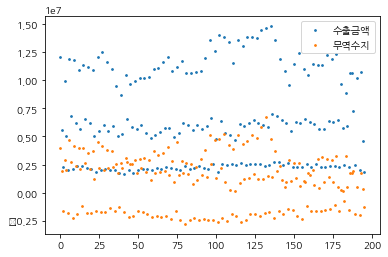

In [17]:
newtrade[['수출금액','무역수지']], newtrade.index
plt.scatter(newtrade.index, newtrade[['수출금액']],s=3, label='수출금액')
plt.legend()
plt.scatter(newtrade.index, newtrade[['무역수지']],s=3, label='무역수지')
plt.legend()

plt.show()

In [18]:
import matplotlib

In [19]:
vgsales = pd.read_csv('vgsales.csv')#,parse_dates=True)
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [20]:
import seaborn as sns
vgsales['Platform']

0        Wii
1        NES
2        Wii
3        Wii
4         GB
        ... 
16593    GBA
16594     GC
16595    PS2
16596     DS
16597    GBA
Name: Platform, Length: 16598, dtype: object